<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

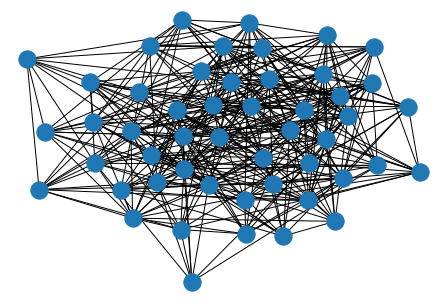

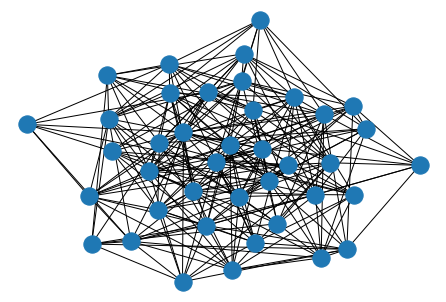

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[[0 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 1 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.96,.02,.02), k=1)[0]
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = P1
                        P2 = P2/3
                        P3 = P3/3
                      elif max(P1,P2,P3) == P2:
                        P1 = P1
                        P2 = P2
                        P3 = P1/2
                      else:
                        P1 = P1
                        P2 = P2/2
                        P3 = P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
              #Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 7:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154]
[184, 366, 637, 959, 1317, 1690, 2195, 2651, 3187, 3671, 4224, 4712, 5404, 5713, 5783, 5559, 5096, 4377, 3656, 2652, 1875, 1185, 708, 425, 272, 151, 98, 62, 43, 26, 17, 14, 10, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 366, 637, 959, 1317, 1690, 2195, 2835, 3553, 4308, 5183, 6029, 7094, 7908, 8618, 9112, 9404, 9560, 9685, 9746, 9783, 9803, 9820, 9829, 9832, 9836, 9844, 9845, 9846]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154]]
[[], [184, 366, 637, 959, 1317, 1690, 2195,

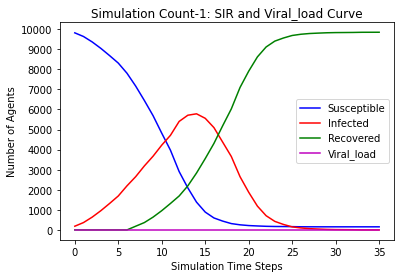

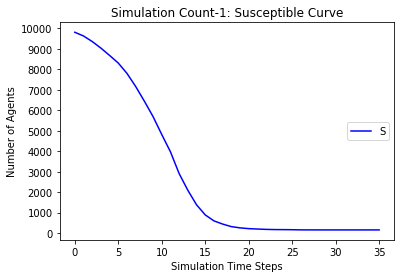

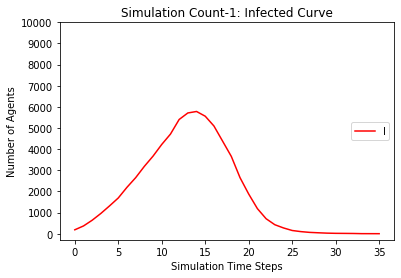

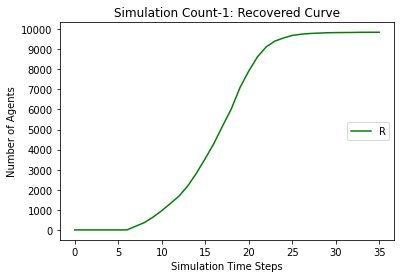

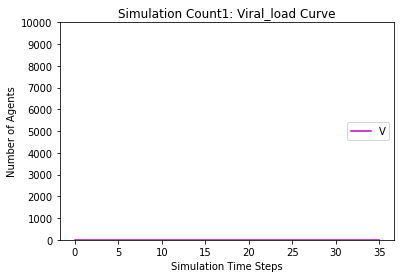

[9816, 9660, 9412, 9109, 8809, 8483, 8081, 7606, 7074, 6528, 5802, 4813, 3720, 2774, 1939, 1369, 1015, 733, 523, 379, 298, 247, 223, 215, 207, 203, 203, 202, 197, 195, 195, 195, 195, 195, 195, 195, 195]
[184, 340, 588, 891, 1191, 1517, 1919, 2210, 2586, 2884, 3307, 3996, 4763, 5307, 5667, 5705, 5513, 5069, 4290, 3341, 2476, 1692, 1146, 800, 526, 320, 176, 96, 50, 28, 20, 12, 8, 8, 7, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 340, 588, 891, 1191, 1517, 1919, 2394, 2926, 3472, 4198, 5187, 6280, 7226, 8061, 8631, 8985, 9267, 9477, 9621, 9702, 9753, 9777, 9785, 9793, 9797, 9797, 9798, 9803, 9805]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154], [9816, 9660, 9412, 91

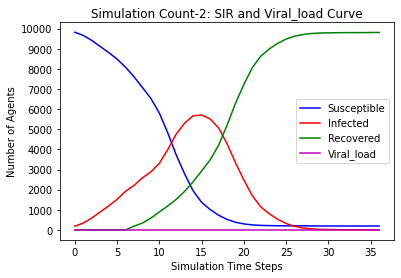

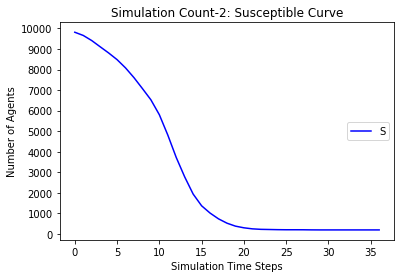

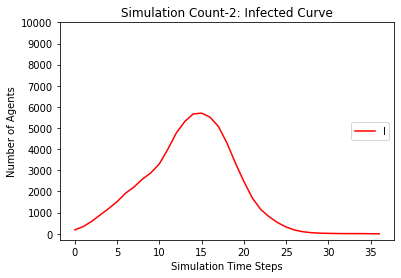

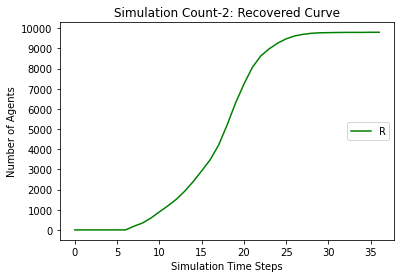

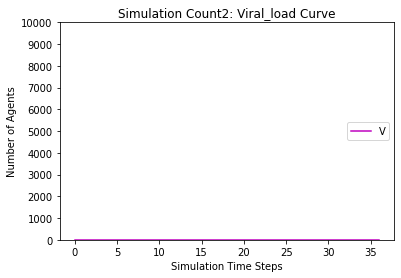

[9816, 9649, 9428, 9143, 8837, 8497, 8085, 7547, 6822, 5936, 4928, 3831, 2851, 1977, 1289, 742, 455, 307, 203, 160, 140, 129, 121, 114, 110, 108, 108, 108, 107, 107, 107, 107, 107, 107, 107, 107]
[184, 351, 572, 857, 1163, 1503, 1915, 2269, 2827, 3492, 4215, 5006, 5646, 6108, 6258, 6080, 5481, 4621, 3628, 2691, 1837, 1160, 621, 341, 197, 95, 52, 32, 22, 14, 7, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 351, 572, 857, 1163, 1503, 1915, 2453, 3178, 4064, 5072, 6169, 7149, 8023, 8711, 9258, 9545, 9693, 9797, 9840, 9860, 9871, 9879, 9886, 9890, 9892, 9892, 9892, 9893]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154], [9816, 9660, 9412, 9109, 8809, 8483, 8081, 7606

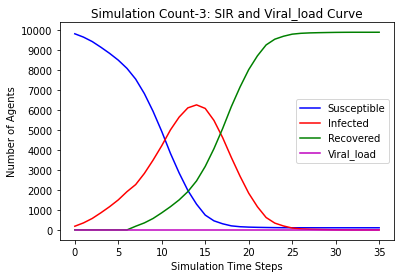

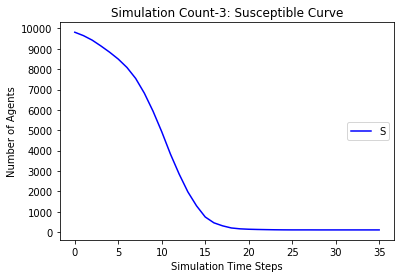

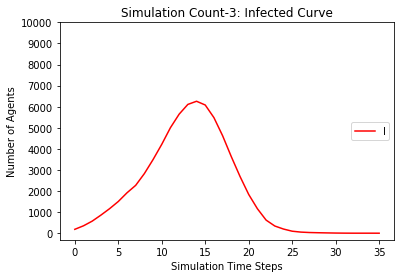

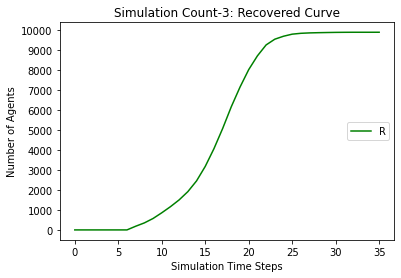

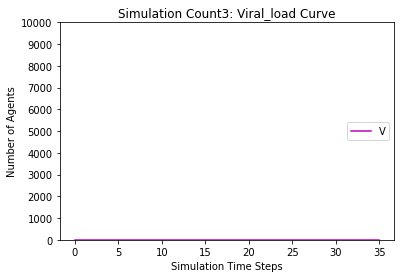

[9816, 9646, 9404, 9093, 8783, 8443, 8069, 7570, 6833, 5975, 5018, 4088, 3005, 2045, 1362, 916, 631, 443, 352, 304, 263, 239, 221, 211, 204, 201, 200, 199, 197, 196, 194, 193, 193, 193, 193, 193, 193, 193, 193]
[184, 354, 596, 907, 1217, 1557, 1931, 2246, 2813, 3429, 4075, 4695, 5438, 6024, 6208, 5917, 5344, 4575, 3736, 2701, 1782, 1123, 695, 420, 239, 151, 104, 64, 42, 25, 17, 11, 8, 7, 6, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 354, 596, 907, 1217, 1557, 1931, 2430, 3167, 4025, 4982, 5912, 6995, 7955, 8638, 9084, 9369, 9557, 9648, 9696, 9737, 9761, 9779, 9789, 9796, 9799, 9800, 9801, 9803, 9804, 9806, 9807]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 15

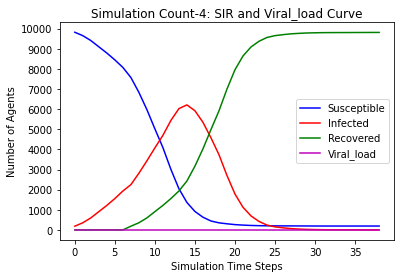

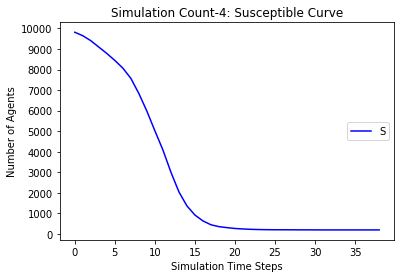

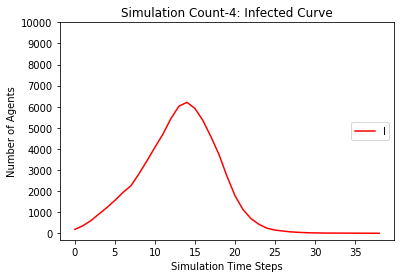

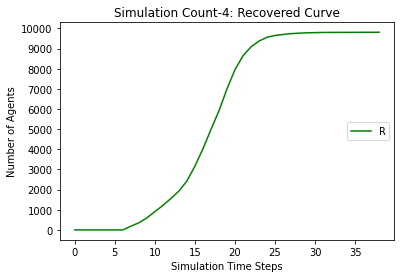

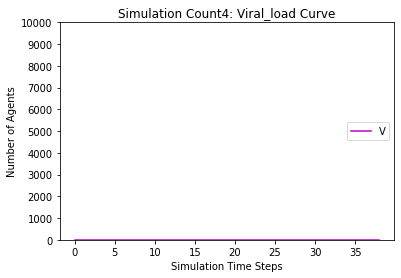

[9816, 9636, 9392, 9103, 8782, 8432, 7986, 7493, 6866, 6040, 5001, 3964, 2816, 1878, 1286, 931, 648, 443, 324, 242, 189, 165, 154, 136, 132, 124, 121, 120, 119, 118, 118, 117, 117, 117, 117, 117, 116, 116, 116, 116, 116, 116, 116, 116]
[184, 364, 608, 897, 1218, 1568, 2014, 2323, 2770, 3352, 4102, 4818, 5616, 6108, 6207, 5935, 5392, 4558, 3640, 2574, 1689, 1121, 777, 512, 311, 200, 121, 69, 46, 36, 18, 15, 7, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 364, 608, 897, 1218, 1568, 2014, 2507, 3134, 3960, 4999, 6036, 7184, 8122, 8714, 9069, 9352, 9557, 9676, 9758, 9811, 9835, 9846, 9864, 9868, 9876, 9879, 9880, 9881, 9882, 9882, 9883, 9883, 9883, 9883, 9883, 9884]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 138

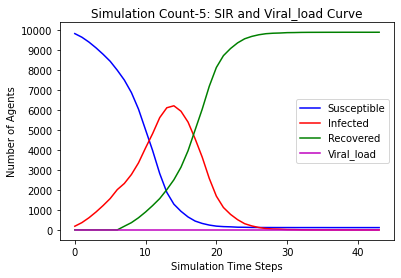

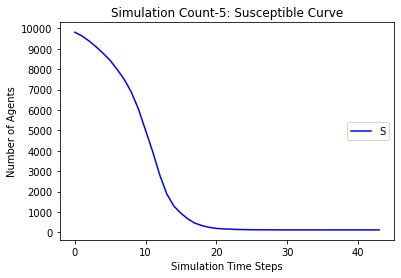

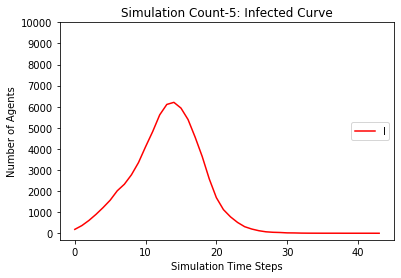

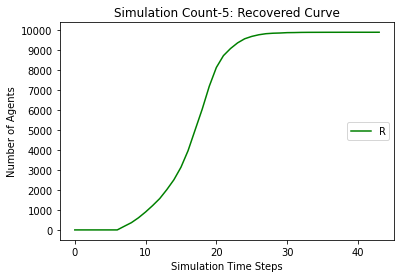

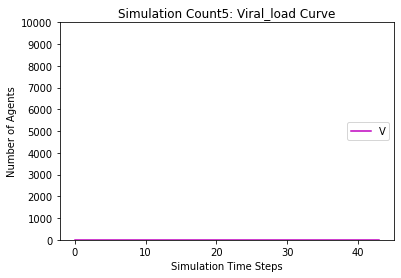

[9816, 9641, 9403, 9111, 8750, 8336, 7908, 7355, 6723, 6115, 5324, 4318, 3158, 2136, 1410, 933, 622, 441, 329, 253, 199, 172, 155, 147, 137, 126, 123, 121, 118, 117, 117, 117, 117, 117, 117, 117, 117]
[184, 359, 597, 889, 1250, 1664, 2092, 2461, 2918, 3288, 3787, 4432, 5178, 5772, 5945, 5790, 5493, 4883, 3989, 2905, 1937, 1238, 778, 475, 304, 203, 130, 78, 54, 38, 30, 20, 9, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 359, 597, 889, 1250, 1664, 2092, 2645, 3277, 3885, 4676, 5682, 6842, 7864, 8590, 9067, 9378, 9559, 9671, 9747, 9801, 9828, 9845, 9853, 9863, 9874, 9877, 9879, 9882, 9883]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154], [9816, 9660, 9412, 9109,

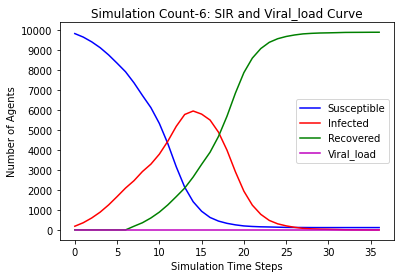

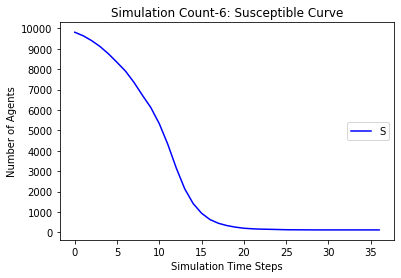

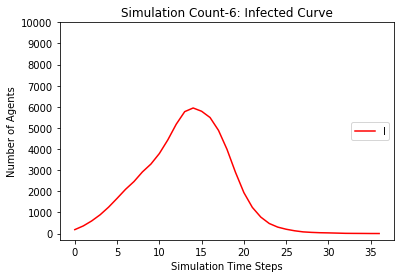

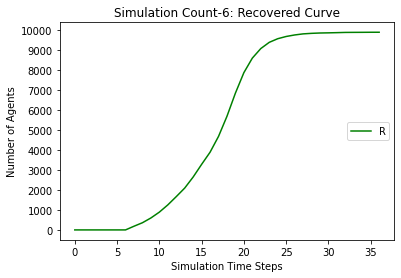

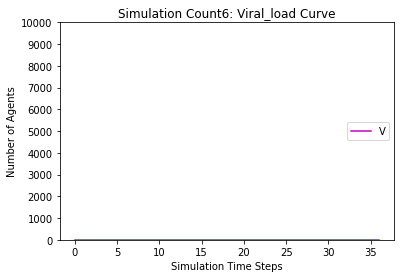

[9816, 9635, 9369, 9025, 8614, 8135, 7635, 7012, 6359, 5531, 4539, 3526, 2622, 1791, 1121, 637, 404, 247, 175, 109, 87, 77, 72, 67, 67, 63, 62, 62, 62, 62, 62, 62, 62, 62]
[184, 365, 631, 975, 1386, 1865, 2365, 2804, 3276, 3838, 4486, 5088, 5513, 5844, 5891, 5722, 5127, 4292, 3351, 2513, 1704, 1044, 565, 337, 180, 112, 47, 25, 15, 10, 5, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 365, 631, 975, 1386, 1865, 2365, 2988, 3641, 4469, 5461, 6474, 7378, 8209, 8879, 9363, 9596, 9753, 9825, 9891, 9913, 9923, 9928, 9933, 9933, 9937, 9938]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154], [9816, 9660, 9412, 9109, 8809, 8483, 8081, 7606, 7074, 6528, 5802, 4813, 3720, 2774, 1939, 1369, 1

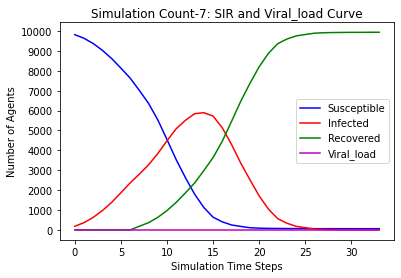

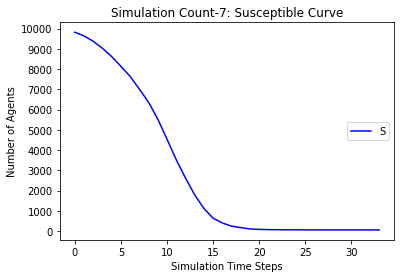

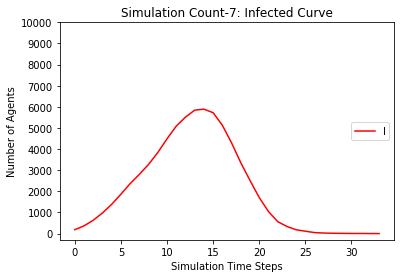

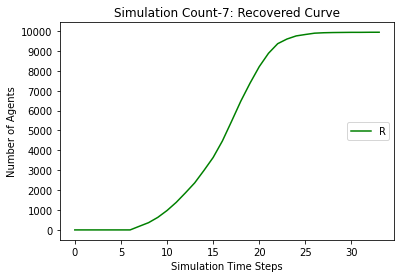

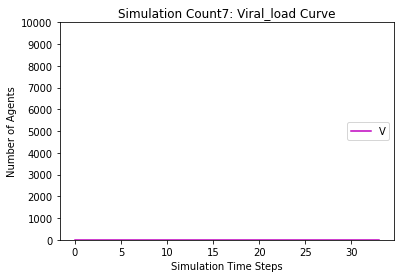

[9816, 9629, 9376, 9077, 8742, 8359, 7798, 7168, 6408, 5352, 4240, 3243, 2353, 1598, 1035, 715, 542, 420, 342, 270, 218, 192, 186, 176, 171, 170, 163, 160, 159, 157, 156, 156, 156, 156, 156, 156, 156, 156]
[184, 371, 624, 923, 1258, 1641, 2202, 2648, 3221, 4024, 4837, 5499, 6006, 6200, 6133, 5693, 4810, 3820, 2901, 2083, 1380, 843, 529, 366, 249, 172, 107, 58, 33, 29, 20, 15, 14, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 371, 624, 923, 1258, 1641, 2202, 2832, 3592, 4648, 5760, 6757, 7647, 8402, 8965, 9285, 9458, 9580, 9658, 9730, 9782, 9808, 9814, 9824, 9829, 9830, 9837, 9840, 9841, 9843, 9844]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 3971, 2906, 2092, 1382, 888, 596, 440, 315, 254, 217, 197, 180, 171, 168, 164, 156, 155, 154, 154, 154, 154, 154, 154, 154, 154], [9816

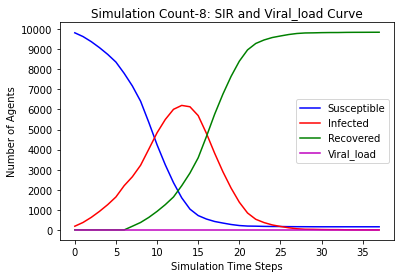

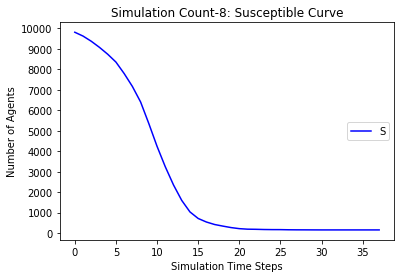

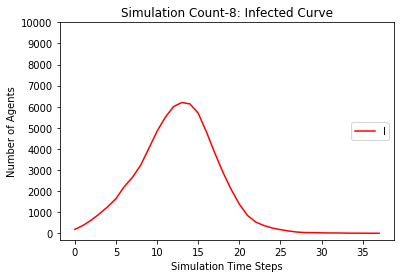

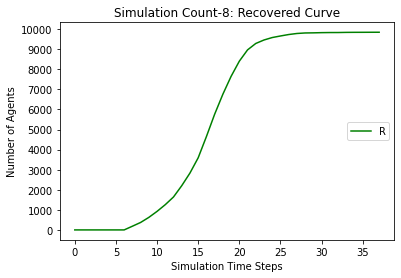

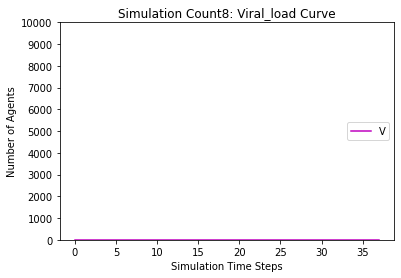

[9816, 9642, 9409, 9129, 8801, 8421, 8002, 7519, 6948, 6256, 5371, 4270, 3141, 2167, 1440, 997, 687, 501, 383, 313, 267, 245, 225, 213, 205, 199, 197, 195, 195, 191, 191, 189, 189, 188, 188, 187, 187, 187, 186, 185, 185, 185, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 358, 591, 871, 1199, 1579, 1998, 2297, 2694, 3153, 3758, 4531, 5280, 5835, 6079, 5951, 5569, 4870, 3887, 2828, 1900, 1195, 772, 474, 296, 184, 116, 72, 50, 34, 22, 16, 10, 9, 7, 8, 4, 4, 3, 4, 3, 3, 3, 3, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 358, 591, 871, 1199, 1579, 1998, 2481, 3052, 3744, 4629, 5730, 6859, 7833, 8560, 9003, 9313, 9499, 9617, 9687, 9733, 9755, 9775, 9787, 9795, 9801, 9803, 9805, 9805, 9809, 9809, 9811, 9811, 9812, 9812, 9813, 9813, 9813, 9814, 9815, 9815, 9815, 9816]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

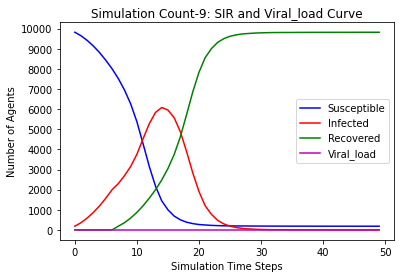

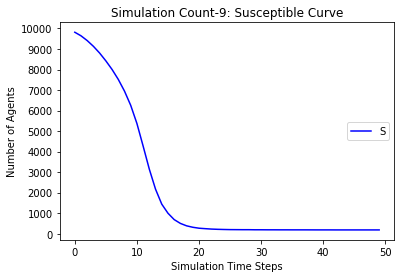

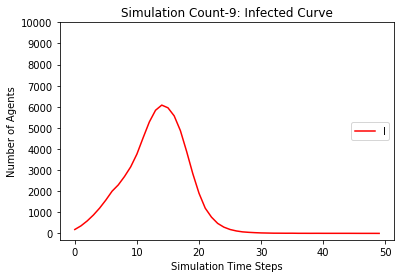

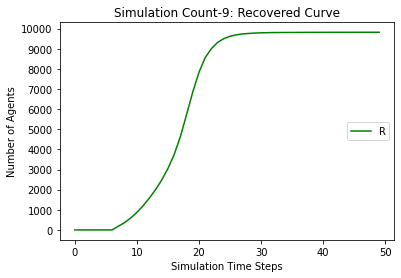

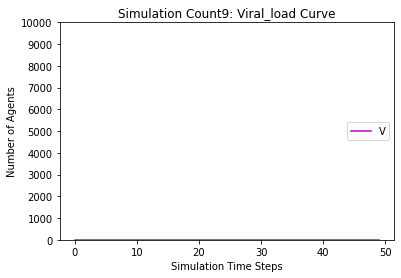

[9816, 9622, 9365, 9051, 8738, 8338, 7814, 7092, 6386, 5483, 4402, 3351, 2406, 1688, 1249, 851, 643, 447, 331, 263, 224, 206, 185, 173, 167, 162, 160, 154, 152, 151, 150, 149, 148, 148, 148, 148, 148, 146, 146, 146, 146, 146, 146, 146, 146]
[184, 378, 635, 949, 1262, 1662, 2186, 2724, 3236, 3882, 4649, 5387, 5932, 6126, 5843, 5535, 4840, 3955, 3020, 2143, 1464, 1043, 666, 470, 280, 169, 103, 70, 54, 34, 23, 18, 14, 12, 6, 4, 3, 4, 3, 2, 2, 2, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 184, 378, 635, 949, 1262, 1662, 2186, 2908, 3614, 4517, 5598, 6649, 7594, 8312, 8751, 9149, 9357, 9553, 9669, 9737, 9776, 9794, 9815, 9827, 9833, 9838, 9840, 9846, 9848, 9849, 9850, 9851, 9852, 9852, 9852, 9852, 9852, 9854]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9816, 9634, 9363, 9041, 8683, 8310, 7805, 7165, 6447, 5692, 4817, 

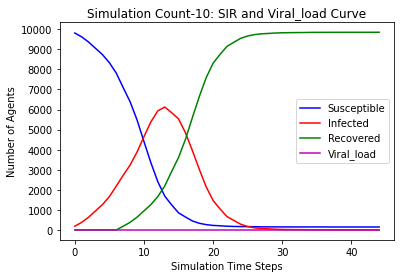

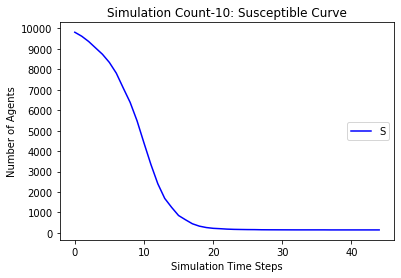

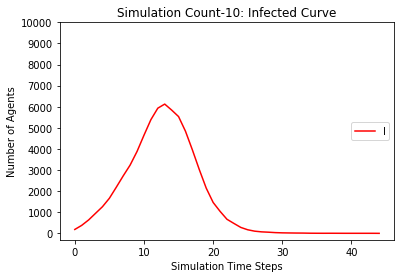

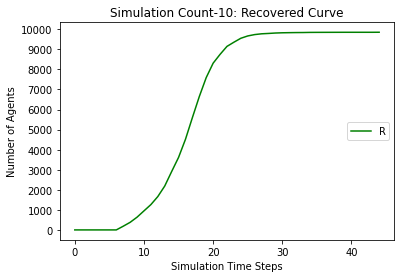

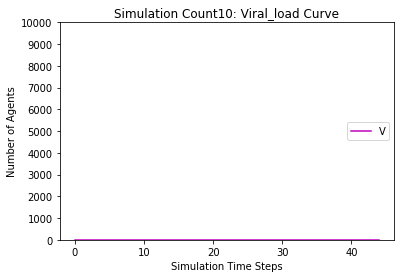

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

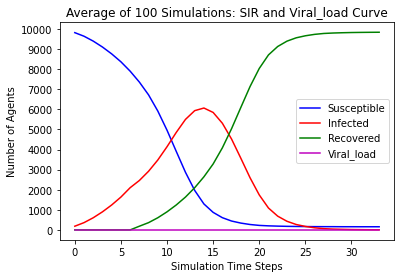

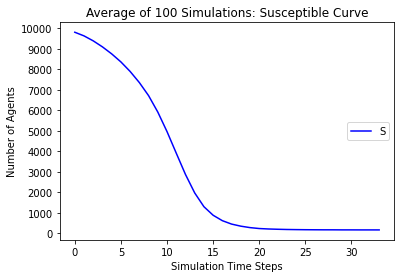

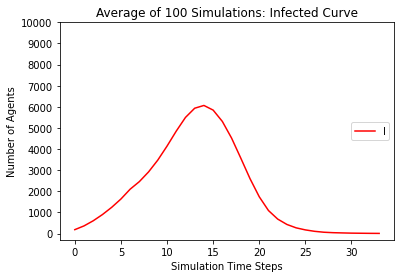

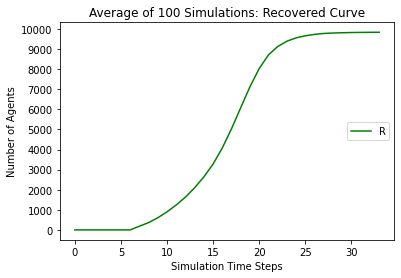

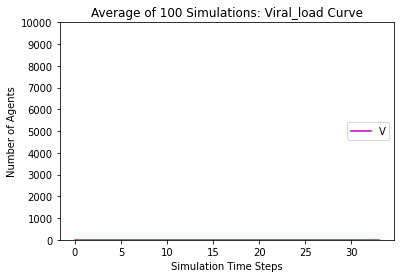

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
